In [1]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from tqdm.notebook import tqdm as tqdm
from tensorflow.keras import Model
from keras.models import Sequential
from sklearn.utils import shuffle
from keras import models, layers
from datetime import datetime
from tensorflow import keras
from keras import backend as K

import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import json
import cv2
import os

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/pandas/core/nanops.py:38: UserWarning: The installed version of bottleneck 0.7.0 is not supported in pandas and will be not be used
The minimum supported version is 1.0.0

  ver=ver, min_ver=_MIN_BOTTLENECK_VERSION), UserWarning)


# Loading Dataset

In [2]:
mapping_data = json.load(open("/root/notebooks/0858611-2/tooth_xray/model/dataset/Dental_Data/PBL/10_seg_attend/mapping.json", "r"))
filter_data  = { path: max(list(map(int, state))) for path, state in mapping_data.items() if max(list(map(int, state))) >= 0 }

In [3]:
def json_2_dataframe_PBL(dataframe, data):
        for path, state in tqdm(data.items()):
                item = { "Path": path, "Class": 0 if state <= 1 else state - 1 }
                dataframe = dataframe.append(item, ignore_index=True)

        return dataframe

PBL_Columns = ["Path", "Class"]
dataset = pd.DataFrame(columns=PBL_Columns)
dataset = json_2_dataframe_PBL(dataset, filter_data)

dataset

,Path,Class
0,Dental_Data/PBL/10_seg_attend/09-13-48-943_000...,0
1,Dental_Data/PBL/10_seg_attend/09-13-48-963_000...,0
2,Dental_Data/PBL/10_seg_attend/09-13-48-982_000...,0
3,Dental_Data/PBL/10_seg_attend/09-13-49-003_000...,0
4,Dental_Data/PBL/10_seg_attend/09-13-49-022_000...,0
5,Dental_Data/PBL/10_seg_attend/09-13-49-040_000...,0
6,Dental_Data/PBL/10_seg_attend/09-13-49-042_000...,0
7,Dental_Data/PBL/10_seg_attend/09-13-49-073_000...,0
8,Dental_Data/PBL/10_seg_attend/09-13-49-089_000...,0
9,Dental_Data/PBL/10_seg_attend/09-13-49-095_000...,0


# Split dataset and guarantee no data pollution 

In [4]:
# data_num = min(len(dataset[dataset["Class"] == 3]), len(dataset[dataset["Class"] == 2]), len(dataset[dataset["Class"] == 1]), len(dataset[dataset["Class"] == 0]))

data_num = min(len(dataset[dataset["Class"] == 2]), len(dataset[dataset["Class"] == 1]), len(dataset[dataset["Class"] == 0]))

# terrible = dataset[dataset["Class"] == 3]
serious = dataset[dataset["Class"] == 2]
medium  = dataset[dataset["Class"] == 1]
healthy = dataset[dataset["Class"] == 0]

In [13]:
def path_2_images(path_list, resize_setting):
        images = []
        for path in tqdm(path_list):
                image = cv2.imread(path, 0)
                image = cv2.resize(image, resize_setting)
                image = np.reshape(image, (*image.shape, 1))
                images.append(image)
        return np.array(images)

train_range = (0, int( data_num * 0.6 ))
valid_range = (train_range[1], int( data_num * 0.8))
test_range  = (valid_range[1], data_num)

# terrible_train   = terrible.iloc[ train_range[0]: train_range[1], :]
# terrible_valid   = terrible.iloc[ valid_range[0]: valid_range[1], :]
# terrible_test    = terrible.iloc[ test_range[0] : test_range[1] , :]

serious_train   = serious.iloc[ train_range[0]: train_range[1], :]
serious_valid   = serious.iloc[ valid_range[0]: valid_range[1], :]
serious_test    = serious.iloc[ test_range[0] : test_range[1] , :]

medium_train    = medium.iloc[ train_range[0]: train_range[1],  :]
medium_valid    = medium.iloc[ valid_range[0]: valid_range[1],  :]
medium_test     = medium.iloc[ test_range[0] : test_range[1] ,  :]

healthy_train   =  healthy.iloc[ train_range[0]: train_range[1], :]
healthy_valid   =  healthy.iloc[ valid_range[0]: valid_range[1], :]
healthy_test    =  healthy.iloc[ test_range[0] : test_range[1] , :]
 
train_dataset   = pd.concat([healthy_train, medium_train, serious_train])
valid_dataset   = pd.concat([healthy_valid, medium_valid, serious_valid])
test_dataset    = pd.concat([healthy_test , medium_test , serious_test ])

train_dataset = shuffle(train_dataset)
valid_dataset = shuffle(valid_dataset)
test_dataset = shuffle(test_dataset)

resize_setting = (256, 256)

X_train, y_train = path_2_images(train_dataset["Path"], resize_setting), to_categorical(train_dataset["Class"], 3)  
X_val, y_val     = path_2_images(valid_dataset["Path"], resize_setting), to_categorical(valid_dataset["Class"], 3) 
X_test, y_test   = path_2_images(test_dataset ["Path"], resize_setting), to_categorical(test_dataset ["Class"], 3)

In [14]:
print(X_train.shape)

(6192, 256, 256, 1)


In [15]:
train_dataset

,Path,Class
1980,Dental_Data/PBL/10_seg_attend/09-14-34-704_002...,0
1057,Dental_Data/PBL/10_seg_attend/09-14-14-395_000...,0
17916,Dental_Data/PBL/10_seg_attend/09-21-37-923_043...,2
19345,Dental_Data/PBL/10_seg_attend/09-22-09-708_051...,2
12250,Dental_Data/PBL/10_seg_attend/09-19-15-841_025...,1
808,Dental_Data/PBL/10_seg_attend/09-14-09-156_000...,0
931,Dental_Data/PBL/10_seg_attend/09-14-11-559_000...,0
7703,Dental_Data/PBL/10_seg_attend/09-17-18-979_007...,2
5552,Dental_Data/PBL/10_seg_attend/09-15-52-659_004...,1
16583,Dental_Data/PBL/10_seg_attend/09-21-07-444_035...,2


In [16]:
def VGG_Net(input_shape, classes):
        model = models.Sequential()
        model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape))
        model.add(MaxPooling2D((2, 2)))
        
        model.add(Conv2D(256, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        
        #model.add(Conv2D(32, (3, 3), activation='relu'))
        #model.add(MaxPooling2D((2, 2)))
        
        model.add(Flatten())
        model.add(Dense(2048, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(classes, activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
        
        return model

In [17]:
input_shape= (*resize_setting, 1)
classes    = 3
model = VGG_Net(input_shape, classes)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 512)     5120      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 512)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 256)     1179904   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 128)       295040    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)       

In [18]:
def plot_result(history):
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(16,5))
        
        plt.subplot(121)
        plt.title("Loss")
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label = 'Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='lower right')
        
        plt.subplot(122)
        plt.title("Accuracy")
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.1, 1.5])
        plt.legend(loc='lower right')
        plt.show()

In [19]:
batch_size = 32
epochs     = 50

callback = tf.keras.callbacks.EarlyStopping(
                monitor="val_accuracy",
                min_delta=0.02,
                patience=10,
                verbose=0,
                mode="auto",
                baseline=None,
                restore_best_weights=False,
)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True, epochs=epochs, batch_size=batch_size)

Train on 6192 samples, validate on 2064 samples
Epoch 1/50
6192/6192 [==============================] - 57s 9ms/step - loss: 3.3815 - accuracy: 0.3458 - val_loss: 1.5334 - val_accuracy: 0.2757
Epoch 2/50
6192/6192 [==============================] - 51s 8ms/step - loss: 1.8117 - accuracy: 0.3464 - val_loss: 1.2128 - val_accuracy: 0.3014
Epoch 3/50
6192/6192 [==============================] - 51s 8ms/step - loss: 1.3524 - accuracy: 0.3664 - val_loss: 1.1634 - val_accuracy: 0.2781
Epoch 4/50
6192/6192 [==============================] - 51s 8ms/step - loss: 1.2279 - accuracy: 0.3808 - val_loss: 1.1424 - val_accuracy: 0.3115
Epoch 5/50
6192/6192 [==============================] - 51s 8ms/step - loss: 1.1457 - accuracy: 0.3963 - val_loss: 1.1310 - val_accuracy: 0.3261
Epoch 6/50
6192/6192 [==============================] - 51s 8ms/step - loss: 1.1037 - accuracy: 0.4147 - val_loss: 1.1360 - val_accuracy: 0.3023
Epoch 7/50
6192/6192 [==============================] - 51s 8ms/step - loss: 1.072

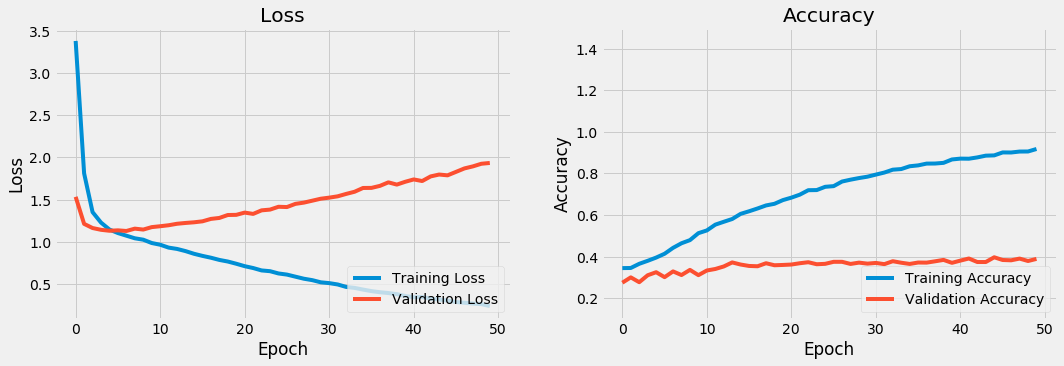

In [20]:
plot_result(history)

Test Loss = 1.7990453090778618
Test Acc  = 0.3449612259864807


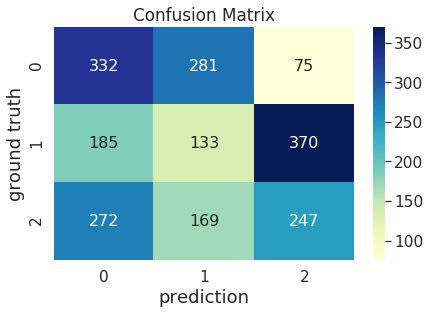

In [21]:
def plot_confusion_matrix(confusion_matrix, classes):
        df_cm = pd.DataFrame(confusion_matrix, range(classes), range(classes))
        sns.set(font_scale=1.4)
        sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='YlGnBu', fmt='g') # font size
        plt.title("Confusion Matrix")
        plt.xlabel('prediction' , fontsize=18)
        plt.ylabel('ground truth', fontsize=18)
        plt.show()

results = model.evaluate(X_test, y_test, verbose=2, batch_size=8)
print("Test Loss = {}\nTest Acc  = {}".format(*results))
prediction = model.predict_classes(X_test, batch_size=8)
y = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y, prediction)
plot_confusion_matrix(confusion, classes)

In [22]:
if not os.path.isfile("CNN_Net.h5"):
        model.save("CNN_Net.h5")

In [23]:
def gradcam(model, x, layer_name):
        preds = model.predict(x)
        pred_class = np.argmax(preds[0])


        # 預測分類的輸出向量
        pred_output = model.output[:, pred_class]
#         preds = model.predict(x) 
        
        pred_output = model.output
        conv_layer = model.get_layer(layer_name)
        grads = K.gradients(pred_output, conv_layer.output)[0]
        pooled_grads = K.sum(grads, axis=(0, 1, 2))
        iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
        pooled_grads_value, conv_layer_output_value = iterate([x])

        for i in range(pooled_grads_value.shape[0]):
                conv_layer_output_value[:, :, i] *= (pooled_grads_value[i])

        heatmap = np.sum(conv_layer_output_value, axis=-1)
    
        return heatmap

def plot_heatmap(heatmaps, image):
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        plt.figure(figsize=(16,5))
        for idx, heatmap in enumerate(heatmaps):
                # ReLU
                heatmap = np.maximum(heatmap, 0)

                # normalize
                heatmap /= np.max(heatmap)
                heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
                heatmap = np.uint8(255 * heatmap)

                plt.subplot(1, 7, idx+1)
                plt.xticks([]), plt.yticks([])
                plt.imshow(image, alpha=0.6)
                plt.imshow(heatmap, cmap='jet', alpha=0.4)
                
        plt.show()

Conv_layers = [ layer.name for layer in model.layers if 'conv' in layer.name ]

same = []
diff = []
for idx, (truth, pred) in enumerate(zip(y, prediction)):
        if truth == pred:
                same.append(idx)
        else:
                diff.append(idx)
same_generator = ( X_test[i] for i in same )
diff_generator = ( X_test[i] for i in diff )

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


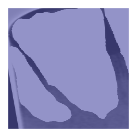

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


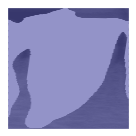

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


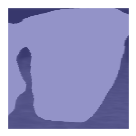

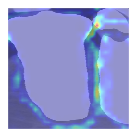

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


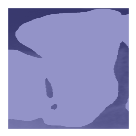

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


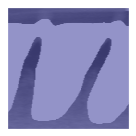

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


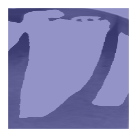

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


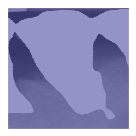

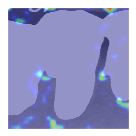

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


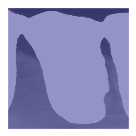

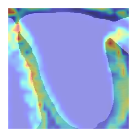

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


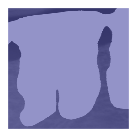

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


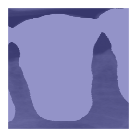

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


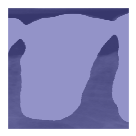

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


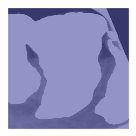

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


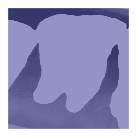

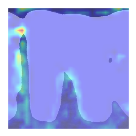

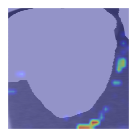

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


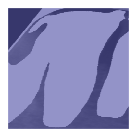

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


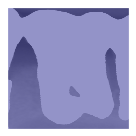

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


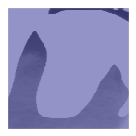

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


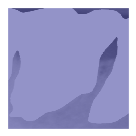

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


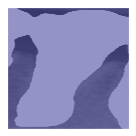

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


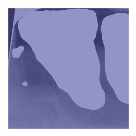

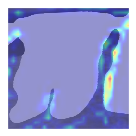

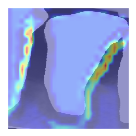

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


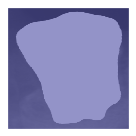

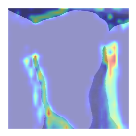

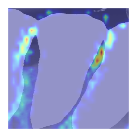

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


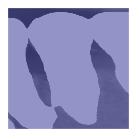

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


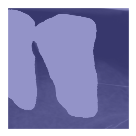

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


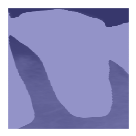

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


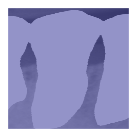

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


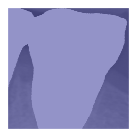

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


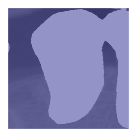

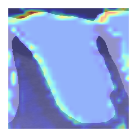

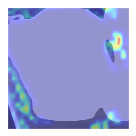

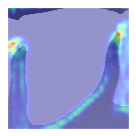

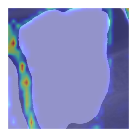

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


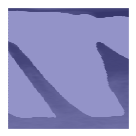

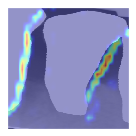

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


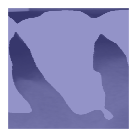

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


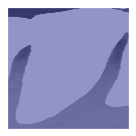

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


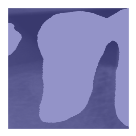

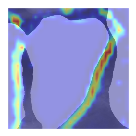

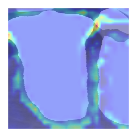

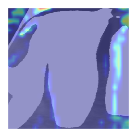

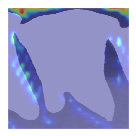

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


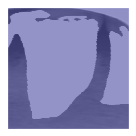

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


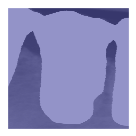

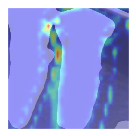

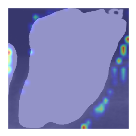

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


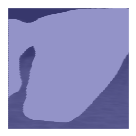

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


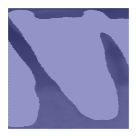

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


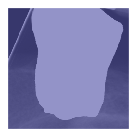

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


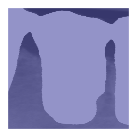

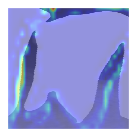

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


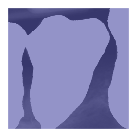

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


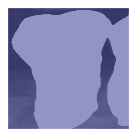

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


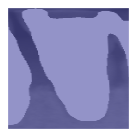

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


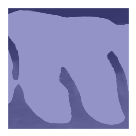

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


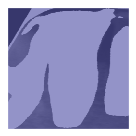

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


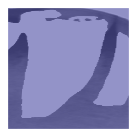

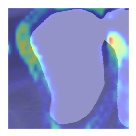

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


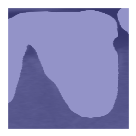

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


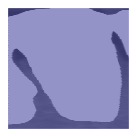

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


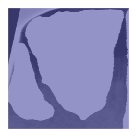

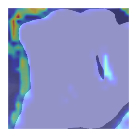

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


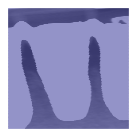

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


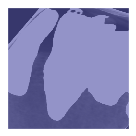

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


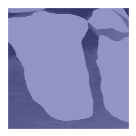

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


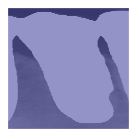

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


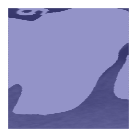

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


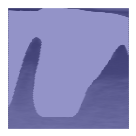

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


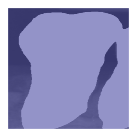

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


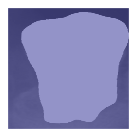

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


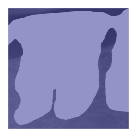

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


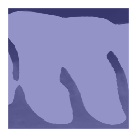

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


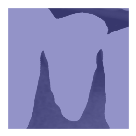

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


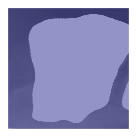

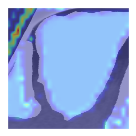

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


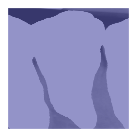

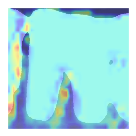

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


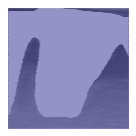

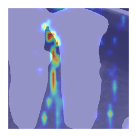

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


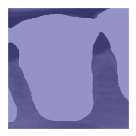

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


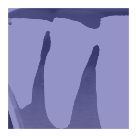

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


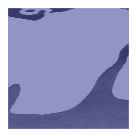

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


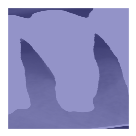

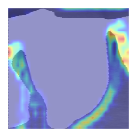

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


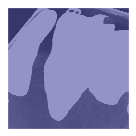

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


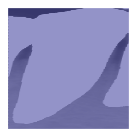

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


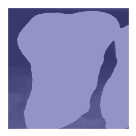

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


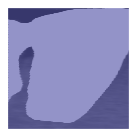

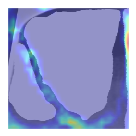

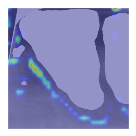

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


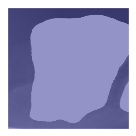

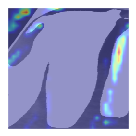

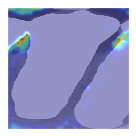

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


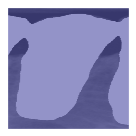

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


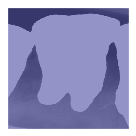

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


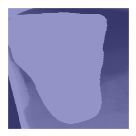

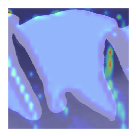

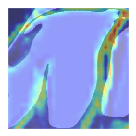

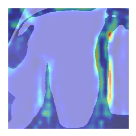

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


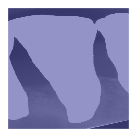

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


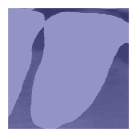

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


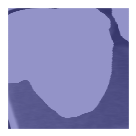

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


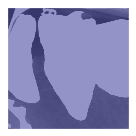

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


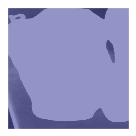

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


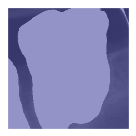

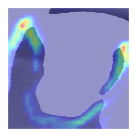

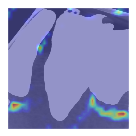

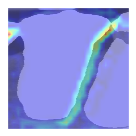

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


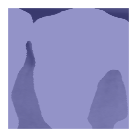

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


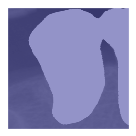

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


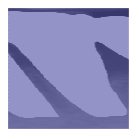

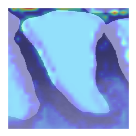

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


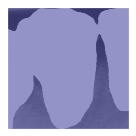

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


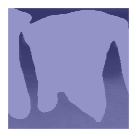

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


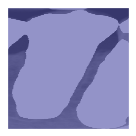

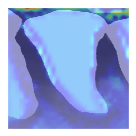

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


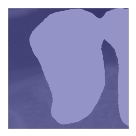

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


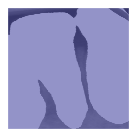

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


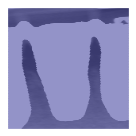

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


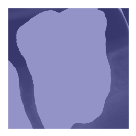

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


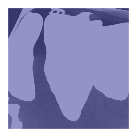

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


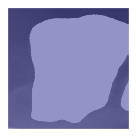

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


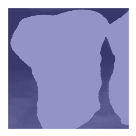

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


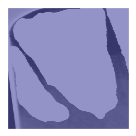

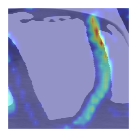

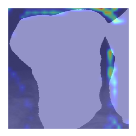

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


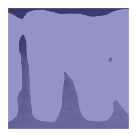

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


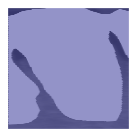

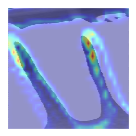

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


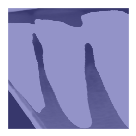

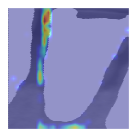

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


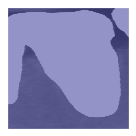

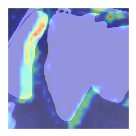

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


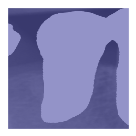

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


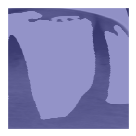

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


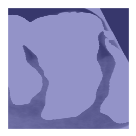

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


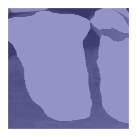

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


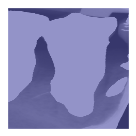

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


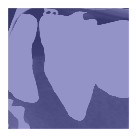

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


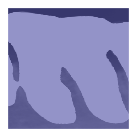

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


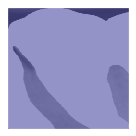

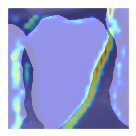

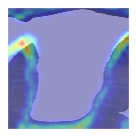

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


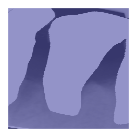

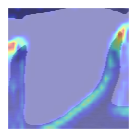

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


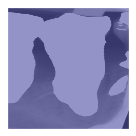

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


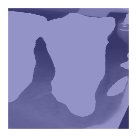

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


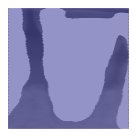

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


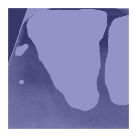

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


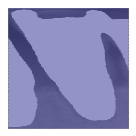

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


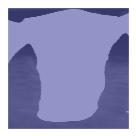

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


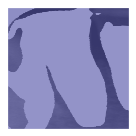

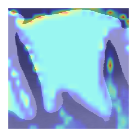

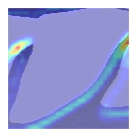

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


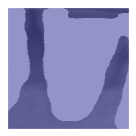

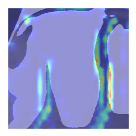

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


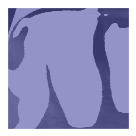

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


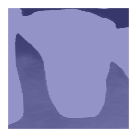

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


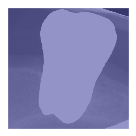

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


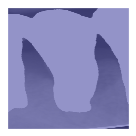

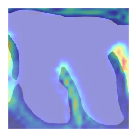

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


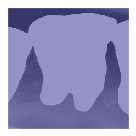

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


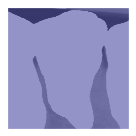

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


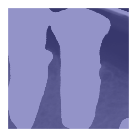

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


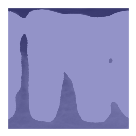

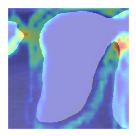

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


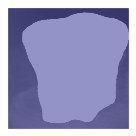

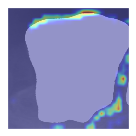

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


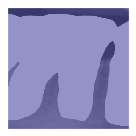

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


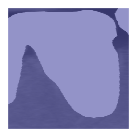

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


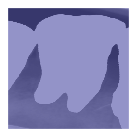

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


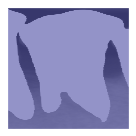

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


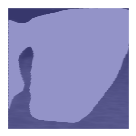

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


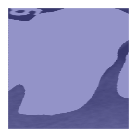

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


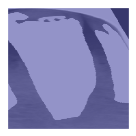

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


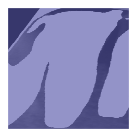

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


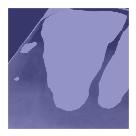

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


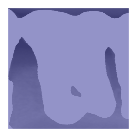

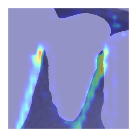

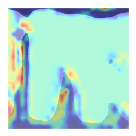

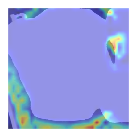

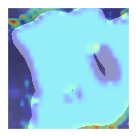

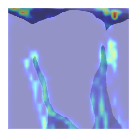

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


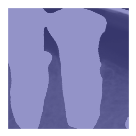

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


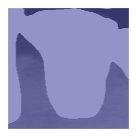

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


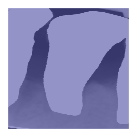

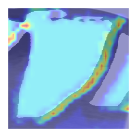

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


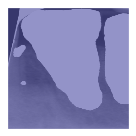

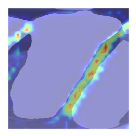

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


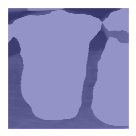

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


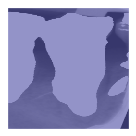

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


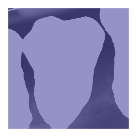

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


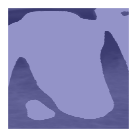

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


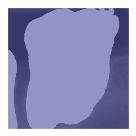

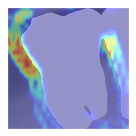

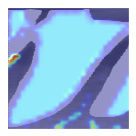

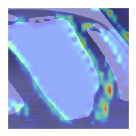

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


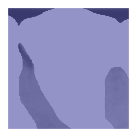

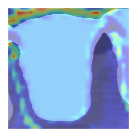

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


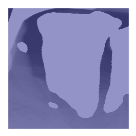

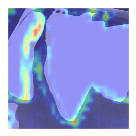

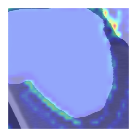

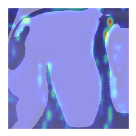

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


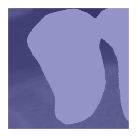

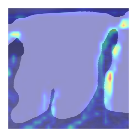

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


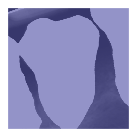

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


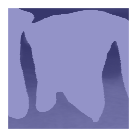

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


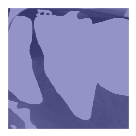

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


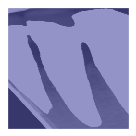

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


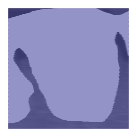

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


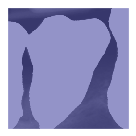

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


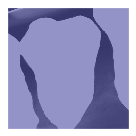

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


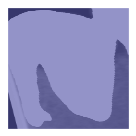

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


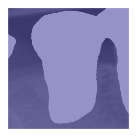

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


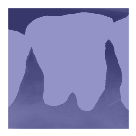

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


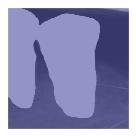

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


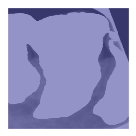

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


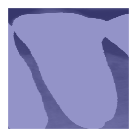

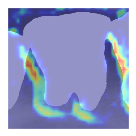

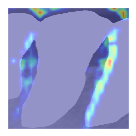

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


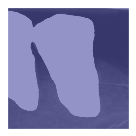

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


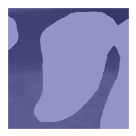

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


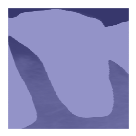

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


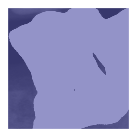

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


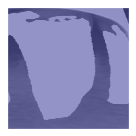

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


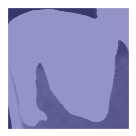

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


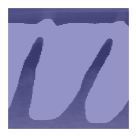

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


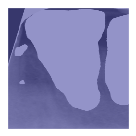

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


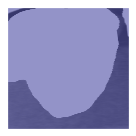

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


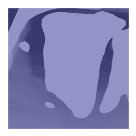

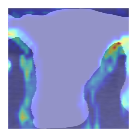

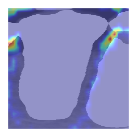

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


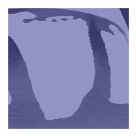

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


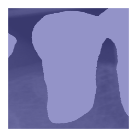

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


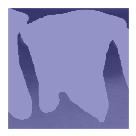

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


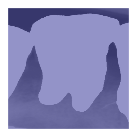

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


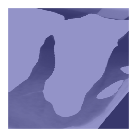

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


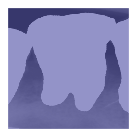

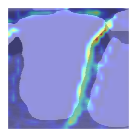

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


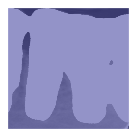

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


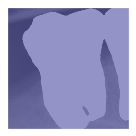

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


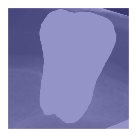

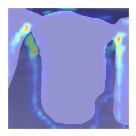

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


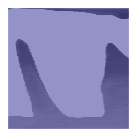

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


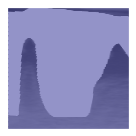

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


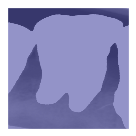

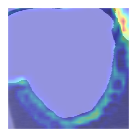

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


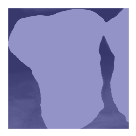

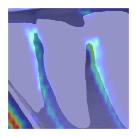

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


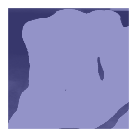

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


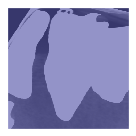

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


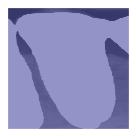

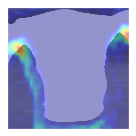

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


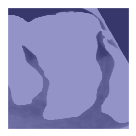

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


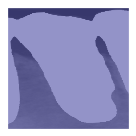

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


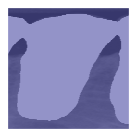

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


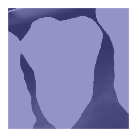

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


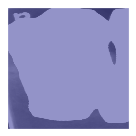

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


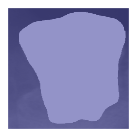

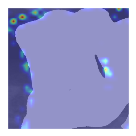

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


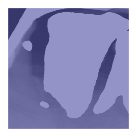

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


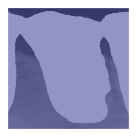

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


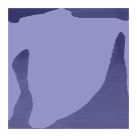

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


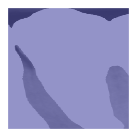

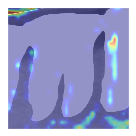

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


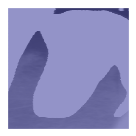

In [ ]:
for idx, i in enumerate(same_generator):
        heatmaps = [ gradcam(model, i.reshape(1, *resize_setting, 1), Conv_layers[-1]) ]
        plot_heatmap(heatmaps, i)

In [ ]:
for idx, i in enumerate(diff_generator):
        heatmaps = [ gradcam(model, i.reshape(1, *resize_setting, 1), Conv_layers[-1]) ]
        plot_heatmap(heatmaps, i)